In [5]:
# Import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

# Set display options if not done yet
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 100)

In [6]:
# Load the training dataset.
df = pd.read_csv('train.csv')

# Take a quick look at the training dataset.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Check out the shape of the training dataset.
df.shape

(1460, 81)

In [8]:
# From the quick obvervation of the training dataset, there are many null values.
# Check out null values from each column.
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

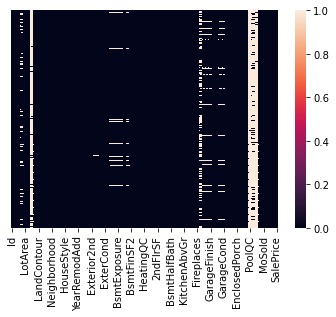

In [9]:
# Draw a heatmap to better visualise these null values.
sns.heatmap(df.isnull(), yticklabels = False)

In [10]:
# Time to deal with null/missing values for each column/feature.

# Fill null with mean.
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# Fill null with mode.
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

# Drop entire columns.
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

# There are a few missing values here, however, fill them with mode/mean does not make sense as they are years.
# Drop 81 records is too much. So drop this feature is probably better.
df.drop(['GarageYrBlt'], axis = 1, inplace = True)

# It only has 8 missing values, however, the most frequent value is recorded as 'None'. Thus, it should be dropped.
df.drop(['MasVnrType'], axis = 1, inplace = True)

# Similar here. Low missing value & the most frequent value is '0' in this case. Drop it.
df.drop(['MasVnrArea'], axis = 1, inplace = True)

# Drop a very few records
# df.dropna(inplace = True)

In [11]:
# Double-check null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

<AxesSubplot:>

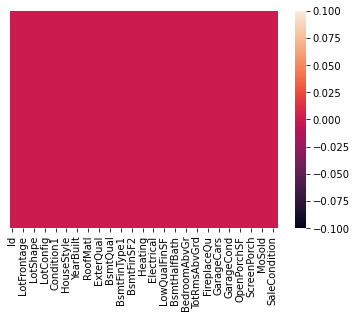

In [12]:
# Double check null values again with heapmaps.
sns.heatmap(df.isnull(), yticklabels = False)

In [13]:
df.shape

(1460, 74)

In [14]:
# Copy the processed training dataset for later use.
train_df = df.copy()

In [15]:
# So far, the data cleaning is done for the training dataset.
# Do data cleaning for the testing dataset now.
df = pd.read_csv('test.csv')

# Take a quick look at the testing dataset.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
# Check out the shape of the testing dataset.
df.shape

(1459, 80)

In [17]:
# Check out null values from each column.
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [18]:
# Deal with null/missing values for each column/feature.

# Fill null with mean.
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean())
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean())

df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mean())
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mean())

# Fill null with mode.
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

# Drop entire columns (based on the testing dataset and the training dataset).
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

df.drop(['MasVnrType', 'MasVnrArea', 'GarageYrBlt'], axis = 1, inplace = True)

# LotFrontage
# Utilities
# Exterior1st
# Exterior2nd
## MasVnrType
## MasVnrArea
# BsmtQual
# BsmtCond
# BsmtExposure
# BsmtFinType1
# BsmtFinSF1
# BsmtFinType2       42
# BsmtFinSF2          1
# BsmtUnfSF           1
# TotalBsmtSF         1
# BsmtFullBath        2
# BsmtHalfBath        2
# KitchenQual         1
# Functional          2
# GarageType         76
## GarageYrBlt        78
# GarageFinish       78
# GarageCars          1
# GarageArea          1
# GarageQual         78
# GarageCond         78
# SaleType            1


# Alley
# FireplaceQu       730
# PoolQC           1456
# Fence            1169
# MiscFeature      1408

In [19]:
# Double-check null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

<AxesSubplot:>

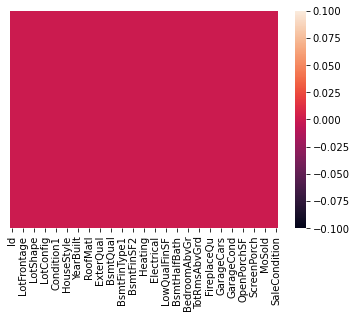

In [20]:
# Check again with heapmaps.
sns.heatmap(df.isnull(), yticklabels = False)

In [21]:
df.shape

(1459, 73)

In [22]:
# Add the 'SalePrice' column to the testing dataset with dummy value -1.
df['SalePrice'] = -1

In [23]:
# Copy the processed training dataset for later use.
test_df = df.copy()

In [24]:
# Combine the processed training and testing datasets to prepare categorical feature transformation
combined_df = pd.concat([train_df, test_df], axis = 0)

# Check the shape of the combined dataset
combined_df.shape

(2919, 74)

In [25]:
# Pick up all categorical features
# categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
#                         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
#                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
#                         'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
#                         'CentralAir', 'Electrical', 'KitchenQual', 'Functional', '', 'FireplaceQu', 'GarageType',
#                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# len(categorical_features)

In [26]:
s = (combined_df.dtypes == 'object')
object_cols = list(s[s].index)

print(object_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [27]:
# Apply one-hot encoder to each categorical columns.
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(combined_df[object_cols]))

# One-hot encoding removes index. Put it back.
OH_cols.index = combined_df.index

# Remove categorical columns.
combined_df = combined_df.drop(object_cols, axis = 1)

# Add one-hot encoded columns to numerical features.
OH_combined_df = pd.concat([combined_df, OH_cols], axis = 1)

In [28]:
OH_combined_df.shape

(2919, 271)

In [29]:
OH_combined_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,225,226,227,228,229,230,231,232,233,234
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X_train = OH_combined_df.iloc[:1460, :]

y_train = X_train['SalePrice']
X_train.drop(['SalePrice'], axis = 1, inplace = True)

X_train.shape

/Users/jieliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1460, 270)

In [31]:
X_test = OH_combined_df.iloc[1460:, :]

# Do not forget to drop the 'SalePrice' column from the processed testing dataset.
X_test.drop(['SalePrice'], axis = 1, inplace = True)

X_test.shape

(1459, 270)

In [52]:
# First attempt
# gb_model = XGBRegressor(n_estimators = 500, learning_rate = 0.05)

# Second attempt
# gb_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)

# Third attempt
gb_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.1)

gb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred = gb_model.predict(X_test)

In [54]:
y_pred

array([128005.88, 160014.25, 179358.44, ..., 157201.14, 112960.71,
       219639.42], dtype=float32)

In [55]:
# Create the submission file
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
submission = pd.concat([sub_df['Id'], pred], axis = 1)
submission.columns = ['Id', 'SalePrice']
submission.to_csv('my_submission.csv', index = False)